In [30]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import ta
import seaborn as sns

In [ ]:
#importando, da bolsa de valores de Frankfurt (FSE), dados das acoes da porsche, bmw e mercedes nos ultimos 365 dias
#valores em Euro
dados_acoes = yf.download(['PAH3.DE', 'BMW.DE', 'MBG.DE'],
                         start='2023-07-16', end='2024-07-16')['Adj Close']

In [ ]:
dados_acoes.to_csv('acoes_german_cars.csv', index=True)

In [2]:
acoes = pd.read_csv('acoes_german_cars.csv', index_col='Date')
acoes.columns = ['BMW', 'MBG', 'PAH']
acoes

,BMW.DE,MBG.DE,PAH3.DE
Date,,,
2023-07-17,100.572601,67.276398,50.601940
2023-07-18,100.855103,67.230019,50.924248
2023-07-19,100.949272,66.691956,51.227592
2023-07-20,101.401283,66.385811,51.227592
2023-07-21,101.307121,66.051842,51.189674
...,...,...,...
2024-07-09,87.699997,63.150002,42.669998
2024-07-10,89.500000,63.950001,42.770000
2024-07-11,91.000000,64.000000,43.250000


---

### Adicionando novas colunas ao dataframe para identificar anomalias com mais facilidade (engenharia de features):

In [4]:
#Variação Percentual = [(Preço de Hoje - Preço de Ontem) / Preço de Ontem] * 100
for empresa in ['BMW', 'MBG', 'PAH']:
    acoes[f"Variacao_{empresa}(%)"] = acoes[empresa].pct_change() * 100
    
acoes

,BMW,MBG,PAH,BMW_variacao(%),MBG_variacao(%),PAH_variacao(%)
Date,,,,,,
2023-07-17,100.572601,67.276398,50.601940,NaN,NaN,NaN
2023-07-18,100.855103,67.230019,50.924248,0.280893,-0.068938,0.636947
2023-07-19,100.949272,66.691956,51.227592,0.093371,-0.800332,0.595678
2023-07-20,101.401283,66.385811,51.227592,0.447761,-0.459043,0.000000
2023-07-21,101.307121,66.051842,51.189674,-0.092861,-0.503073,-0.074019
...,...,...,...,...,...,...
2024-07-09,87.699997,63.150002,42.669998,0.665742,-3.425597,-0.350307
2024-07-10,89.500000,63.950001,42.770000,2.052455,1.266824,0.234362
2024-07-11,91.000000,64.000000,43.250000,1.675978,0.078185,1.122281


In [ ]:
acoes['BMW_variacao(%)'].describe()

In [ ]:
acoes['Mercedes_variacao(%)'].describe()

In [ ]:
acoes['Porsche_variacao(%)'].describe()

In [5]:
#media movel: calcula a media de variacao dentro de espaços de tempo
      
for empresa in ['BMW', 'MBG', 'PAH']:
    acoes[f'MM5_{empresa}'] = acoes[empresa].rolling(window=5).mean()

acoes.head()

,BMW,MBG,PAH,BMW_variacao(%),MBG_variacao(%),PAH_variacao(%),MM5_BMW,MM5_MBG,MM5_PAH
Date,,,,,,,,,
2023-07-17,100.572601,67.276398,50.601940,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-18,100.855103,67.230019,50.924248,0.280893,-0.068938,0.636947,NaN,NaN,NaN
2023-07-19,100.949272,66.691956,51.227592,0.093371,-0.800332,0.595678,NaN,NaN,NaN
2023-07-20,101.401283,66.385811,51.227592,0.447761,-0.459043,0.000000,NaN,NaN,NaN
2023-07-21,101.307121,66.051842,51.189674,-0.092861,-0.503073,-0.074019,101.017076,66.727205,51.034209
...,...,...,...,...,...,...,...,...,...
2024-07-09,87.699997,63.150002,42.669998,0.665742,-3.425597,-0.350307,87.824001,65.050002,42.781999
2024-07-10,89.500000,63.950001,42.770000,2.052455,1.266824,0.234362,88.036000,64.780001,42.798000
2024-07-11,91.000000,64.000000,43.250000,1.675978,0.078185,1.122281,88.603999,64.392001,42.866000


In [14]:
#Volatilidade (Desvio Padrão Móvel): para entender se a ação gera altos riscos de investimentos, ou se é mais segura

      
for empresa in ["BMW", "MBG", "PAH"]:
    acoes[f"DPM20{empresa}"] = acoes[f"Variacao_{empresa}(%)"].rolling(window=20).std()*100

acoes.head(21)

,BMW,MBG,PAH,Variacao_BMW(%),Variacao_MBG(%),Variacao_PAH(%),MM5_BMW,MM5_MBG,MM5_PAH,DPM20BMW,DPM20MBG,DPM20PAH
Date,,,,,,,,,,,,
2023-07-17,100.572601,67.276398,50.601940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-18,100.855103,67.230019,50.924248,0.280893,-0.068938,0.636947,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-19,100.949272,66.691956,51.227592,0.093371,-0.800332,0.595678,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-20,101.401283,66.385811,51.227592,0.447761,-0.459043,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-21,101.307121,66.051842,51.189674,-0.092861,-0.503073,-0.074019,101.017076,66.727205,51.034209,NaN,NaN,NaN
2023-07-24,102.267639,66.237381,51.625732,0.948125,0.280899,0.851848,101.356084,66.519402,51.238968,NaN,NaN,NaN
2023-07-25,102.098137,66.070396,51.474060,-0.165744,-0.252100,-0.293792,101.604691,66.287477,51.348930,NaN,NaN,NaN
2023-07-26,100.911606,64.901505,50.848408,-1.162148,-1.769161,-1.215471,101.597157,65.929387,51.273093,NaN,NaN,NaN
2023-07-27,103.548340,67.461945,51.000080,2.612915,3.945117,0.298283,102.026569,66.144614,51.227591,NaN,NaN,NaN


In [17]:
#índice de força relativa: avalia se um ativo esta para cair ou subir
#RSI acima de 70: ativo está sobrecomprado (pode estar prestes a cair)
#RSI abaixo de 30: ativo está sobrevendido (pode estar prestes a subir)
#no gráfico do RSI como um oscilador que se move entre 0 e 100, as áreas acima de 70 e abaixo de 30 são "zonas de alerta"

for empresa in ["BMW", "MBG", "PAH"]:
    rsi = ta.momentum.RSIIndicator(close = acoes[f'{empresa}'], window=14) # Ajuste a coluna da empresa 
    acoes[f'RSI14_{empresa}'] = rsi.rsi()

acoes.head(21)

,BMW,MBG,PAH,Variacao_BMW(%),Variacao_MBG(%),Variacao_PAH(%),MM5_BMW,MM5_MBG,MM5_PAH,DPM20BMW,DPM20MBG,DPM20PAH,RSI14_BMW,RSI14_MBG,RSI14_PAH
Date,,,,,,,,,,,,,,,
2023-07-17,100.572601,67.276398,50.601940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-18,100.855103,67.230019,50.924248,0.280893,-0.068938,0.636947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-19,100.949272,66.691956,51.227592,0.093371,-0.800332,0.595678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-20,101.401283,66.385811,51.227592,0.447761,-0.459043,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-21,101.307121,66.051842,51.189674,-0.092861,-0.503073,-0.074019,101.017076,66.727205,51.034209,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-24,102.267639,66.237381,51.625732,0.948125,0.280899,0.851848,101.356084,66.519402,51.238968,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-25,102.098137,66.070396,51.474060,-0.165744,-0.252100,-0.293792,101.604691,66.287477,51.348930,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-26,100.911606,64.901505,50.848408,-1.162148,-1.769161,-1.215471,101.597157,65.929387,51.273093,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-27,103.548340,67.461945,51.000080,2.612915,3.945117,0.298283,102.026569,66.144614,51.227591,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#algumas colunas do dataframe estao com valores NaN, devido a criação de novas features
#é necessário removê-las para continuar
acoes = acoes.dropna()

In [19]:
acoes

,BMW,MBG,PAH,Variacao_BMW(%),Variacao_MBG(%),Variacao_PAH(%),MM5_BMW,MM5_MBG,MM5_PAH,DPM20BMW,DPM20MBG,DPM20PAH,RSI14_BMW,RSI14_MBG,RSI14_PAH
Date,,,,,,,,,,,,,,,
2023-08-14,94.263268,63.862480,47.701191,0.110017,-0.390686,-0.710344,95.150340,64.578664,48.034874,164.734983,137.217673,87.536155,29.652949,33.853611,20.606267
2023-08-15,93.425163,63.203819,47.625359,-0.889110,-1.031374,-0.158974,94.651244,64.179755,47.959038,164.602479,138.228812,84.863601,27.588020,30.833528,20.170390
2023-08-16,93.943092,63.342976,47.322006,0.554379,0.220171,-0.636956,94.349902,63.953397,47.822531,165.603485,138.165492,82.215207,30.795250,32.209496,18.485850
2023-08-17,93.321571,62.637924,47.103977,-0.661593,-1.113070,-0.460735,93.822554,63.432032,47.558998,164.660992,139.458529,81.701466,29.128001,29.055614,17.363432
2023-08-18,92.521141,62.174080,46.430931,-0.857712,-0.740517,-1.428852,93.494847,63.044256,47.236693,164.795291,139.758298,84.296411,27.093602,27.170672,14.447247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-09,87.699997,63.150002,42.669998,0.665742,-3.425597,-0.350307,87.824001,65.050002,42.781999,127.123012,121.857314,150.723393,40.848083,38.553662,37.177107
2024-07-10,89.500000,63.950001,42.770000,2.052455,1.266824,0.234362,88.036000,64.780001,42.798000,135.095518,124.605947,146.217785,49.924004,44.182841,38.736454
2024-07-11,91.000000,64.000000,43.250000,1.675978,0.078185,1.122281,88.603999,64.392001,42.866000,129.938818,117.647517,72.252528,55.984771,44.524904,45.702983


---

### Análise Exploratória

In [ ]:
empresas = ['BMW', 'MBG', 'PAH']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

for i, empresa in enumerate(empresas):
    plt.sca(axes[i])  # Define o subplot atual
    plt.plot(acoes[empresa], label='Preço da Ação')
    plt.plot(acoes[f"MM5_{empresa}"], label='Média Móvel (5 dias)')
    plt.xlabel('Período de 1 ano')
    plt.xticks([])
    plt.ylabel('Preço')
    plt.title(f'Preço da Ação, Média Móvel - {empresa}')
    plt.legend(loc='upper left')
    plt.grid()

plt.tight_layout()
plt.show()

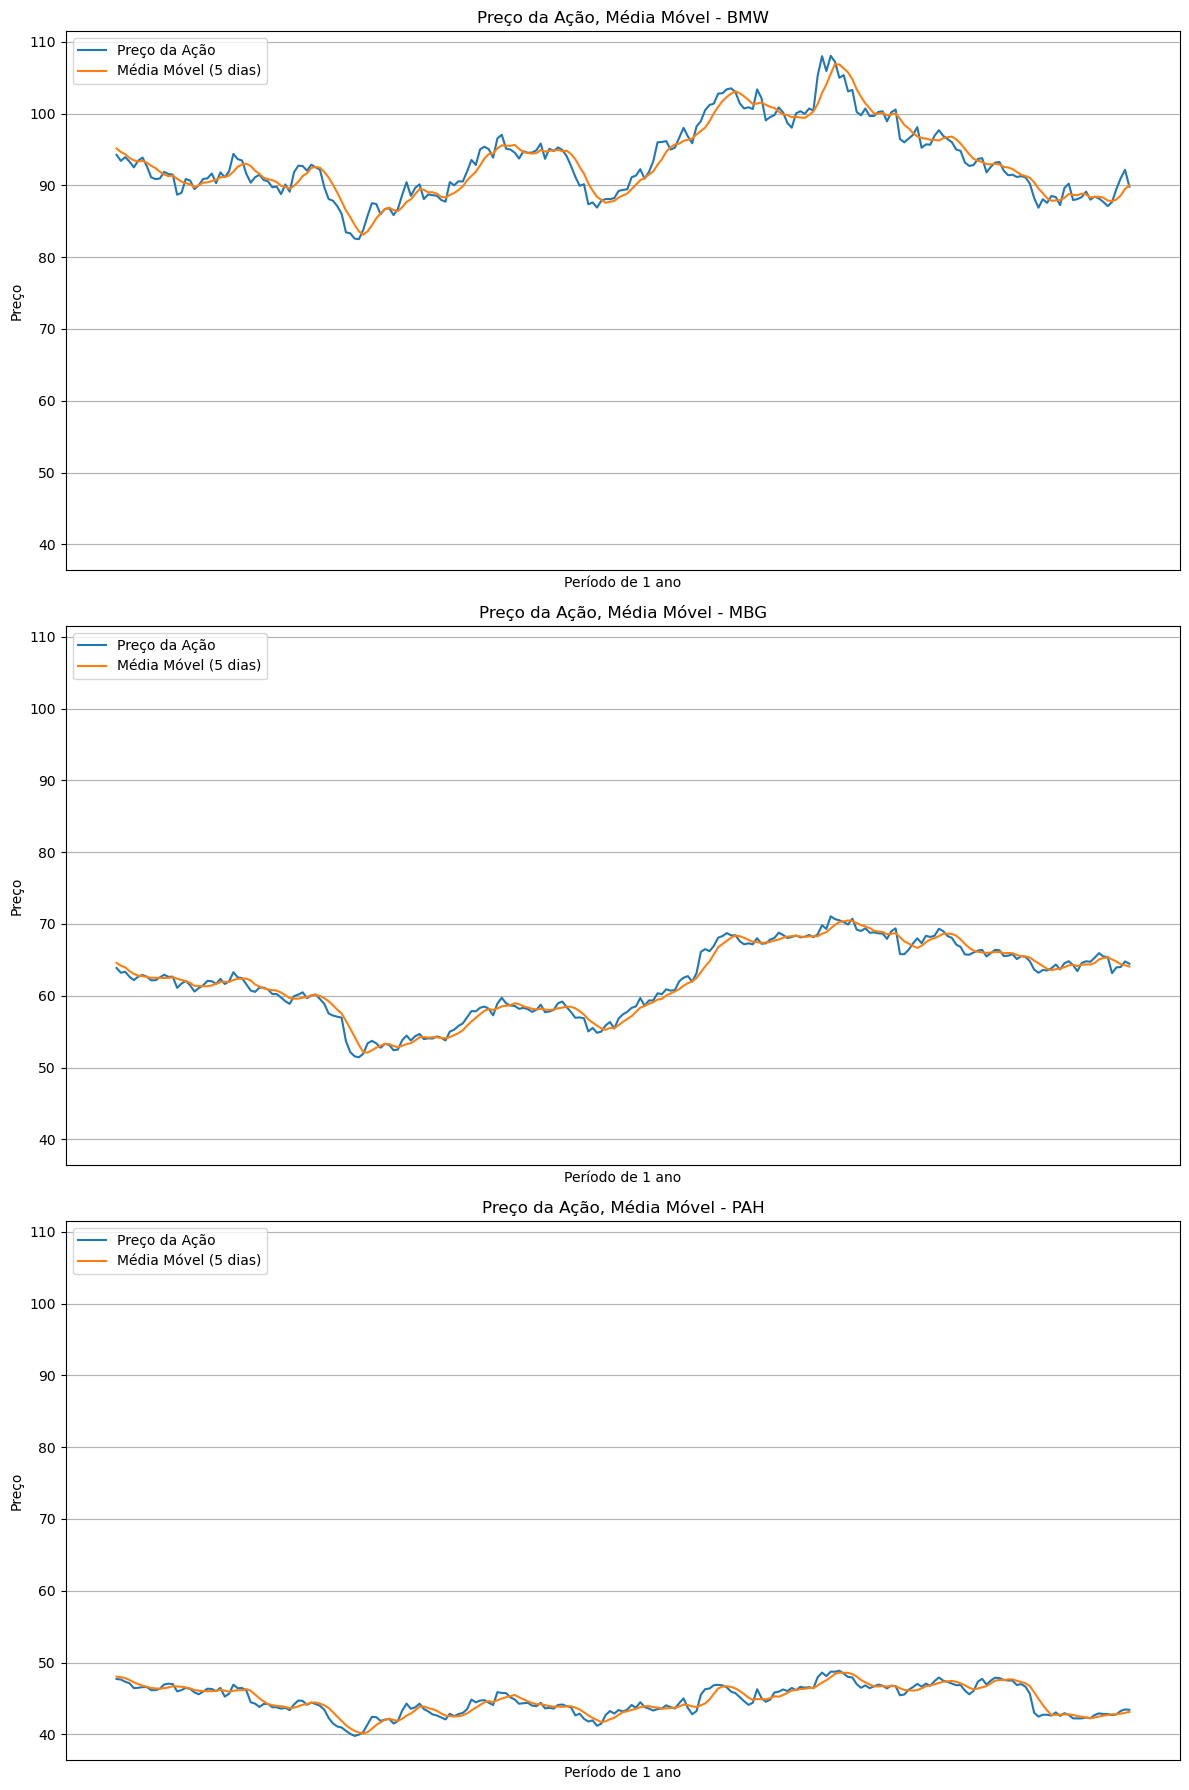

In [58]:
empresas = ['BMW', 'MBG', 'PAH']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18), sharey=True)
cores = ['powderblue', 'aliceblue', 'azure']

for i, empresa in enumerate(empresas):
    plt.sca(axes[i])  # Define o subplot atual
    plt.plot(acoes[empresa], label='Preço da Ação')
    plt.plot(acoes[f"MM5_{empresa}"], label='Média Móvel (5 dias)')
    plt.xlabel('Período de 1 ano')
    plt.xticks([])
    plt.ylabel('Preço')
    plt.title(f'Preço da Ação, Média Móvel - {empresa}')
    plt.legend(loc='upper left')
    plt.grid()

plt.tight_layout()
plt.show()

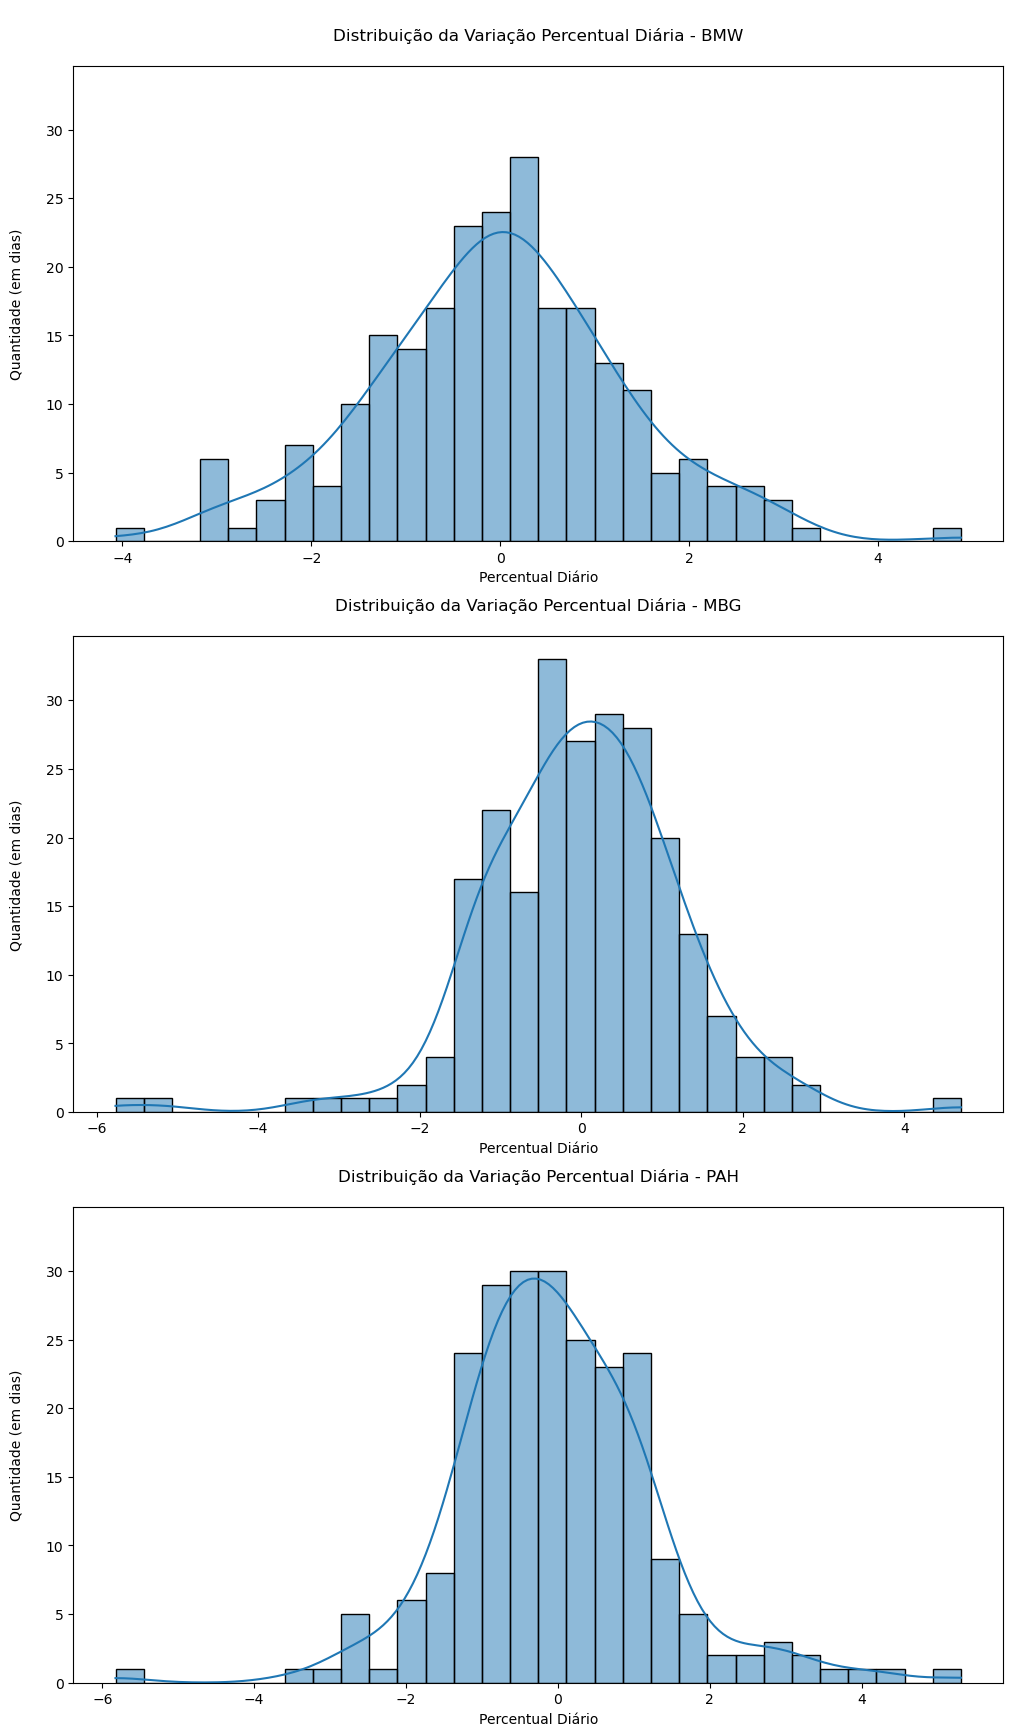

In [46]:
empresas = ['BMW', 'MBG', 'PAH']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 21), sharey=True)

for i, empresa in enumerate(empresas):
    plt.sca(axes[i])  # Define o subplot atual
    sns.histplot(acoes[f'Variacao_{empresa}(%)'], bins=30, kde=True)
    plt.title(f"\nDistribuição da Variação Percentual Diária - {empresa}\n")
    plt.xlabel('Percentual Diário')
    plt.ylabel('Quantidade (em dias)\n')
    
plt.show()

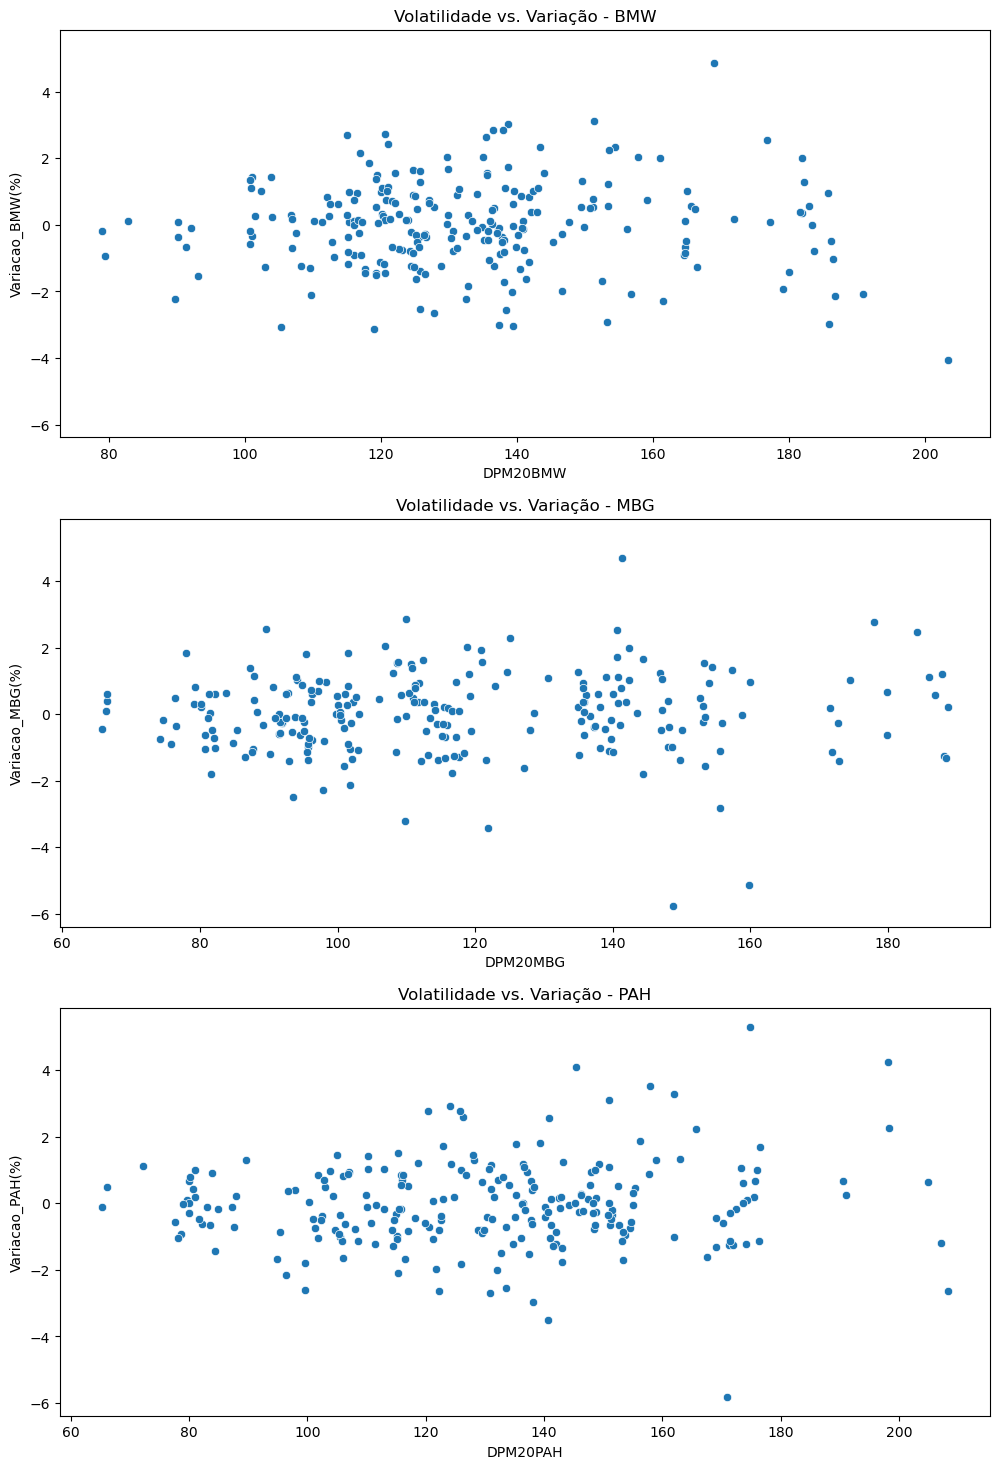

In [49]:
empresas = ['BMW', 'MBG', 'PAH']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18), sharey=True)

for i, empresa in enumerate(empresas):
    plt.sca(axes[i])
    sns.scatterplot(x=f"DPM20{empresa}", y=f'Variacao_{empresa}(%)', data=acoes)
    plt.title(f"Volatilidade vs. Variação - {empresa}")
    #plt.legend(loc='upper left')
    
plt.show()

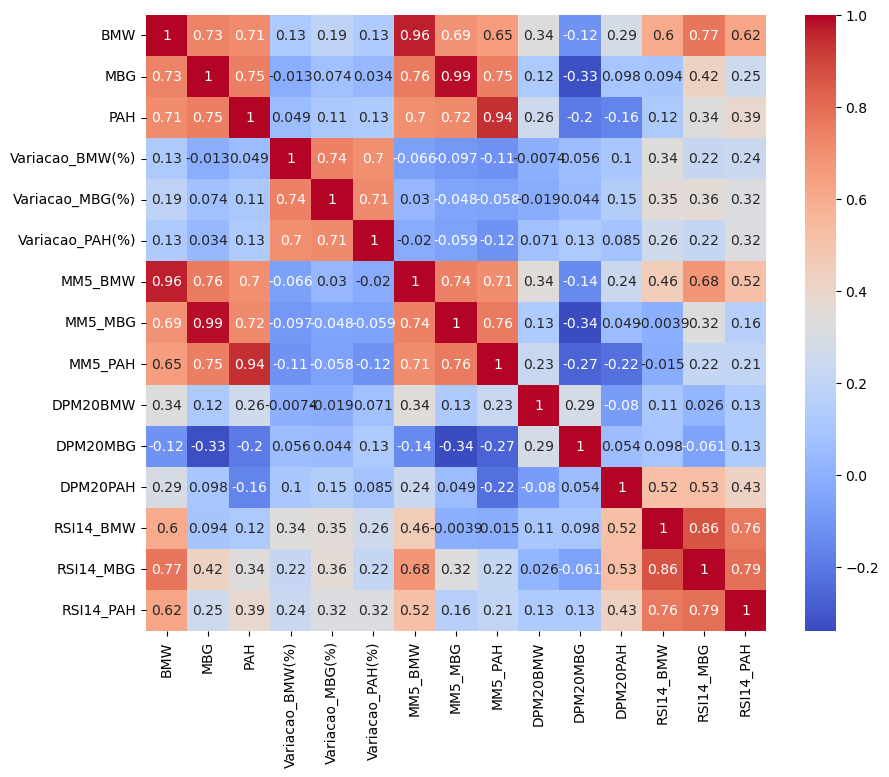

In [50]:
#correlacoes


plt.figure(figsize=(10, 8))
sns.heatmap(acoes.corr(), annot=True, cmap="coolwarm")
plt.show()

In [59]:
acoes

,BMW,MBG,PAH,Variacao_BMW(%),Variacao_MBG(%),Variacao_PAH(%),MM5_BMW,MM5_MBG,MM5_PAH,DPM20BMW,DPM20MBG,DPM20PAH,RSI14_BMW,RSI14_MBG,RSI14_PAH
Date,,,,,,,,,,,,,,,
2023-08-14,94.263268,63.862480,47.701191,0.110017,-0.390686,-0.710344,95.150340,64.578664,48.034874,164.734983,137.217673,87.536155,29.652949,33.853611,20.606267
2023-08-15,93.425163,63.203819,47.625359,-0.889110,-1.031374,-0.158974,94.651244,64.179755,47.959038,164.602479,138.228812,84.863601,27.588020,30.833528,20.170390
2023-08-16,93.943092,63.342976,47.322006,0.554379,0.220171,-0.636956,94.349902,63.953397,47.822531,165.603485,138.165492,82.215207,30.795250,32.209496,18.485850
2023-08-17,93.321571,62.637924,47.103977,-0.661593,-1.113070,-0.460735,93.822554,63.432032,47.558998,164.660992,139.458529,81.701466,29.128001,29.055614,17.363432
2023-08-18,92.521141,62.174080,46.430931,-0.857712,-0.740517,-1.428852,93.494847,63.044256,47.236693,164.795291,139.758298,84.296411,27.093602,27.170672,14.447247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-09,87.699997,63.150002,42.669998,0.665742,-3.425597,-0.350307,87.824001,65.050002,42.781999,127.123012,121.857314,150.723393,40.848083,38.553662,37.177107
2024-07-10,89.500000,63.950001,42.770000,2.052455,1.266824,0.234362,88.036000,64.780001,42.798000,135.095518,124.605947,146.217785,49.924004,44.182841,38.736454
2024-07-11,91.000000,64.000000,43.250000,1.675978,0.078185,1.122281,88.603999,64.392001,42.866000,129.938818,117.647517,72.252528,55.984771,44.524904,45.702983
